<a href="https://colab.research.google.com/github/vinayaka16041999/Data-Science-ML-Projects/blob/master/Internship_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.model_selection import RepeatedStratifiedKFold

# Importing the data

In [3]:
df = pd.read_csv(r'/content/data.csv')

In [4]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


# Filling the missing values(8 in total) using the Forward Fill method

In [6]:
df['x1'] = df['x1'].fillna(method='ffill')
df['x2'] = df['x2'].fillna(method='ffill')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2227 non-null   float64
 1   x2      2227 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


# Seperating Dependent and Independent dimensions into numpy array

In [21]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Finding the outliers through visualizations

2 Outliers found


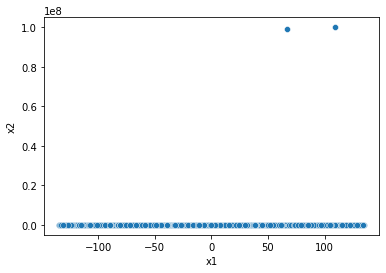

In [12]:
sb.scatterplot(x='x1',y='x2',data=df)
print("2 Outliers found")

In [13]:
zscore = zscore(df)

# Removing the outliers through zscore method

In [15]:
abs_z_scores = np.abs(zscore)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

Outliers Removed


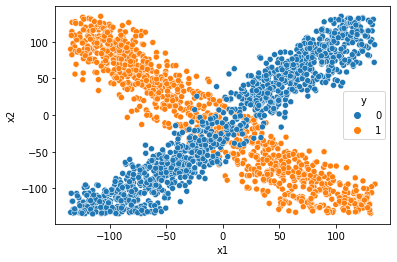

In [18]:
sb.scatterplot(x='x1',y='x2',data=new_df,hue='y')
print("Outliers Removed")

In [19]:
print("Before removing outliers",df.shape)
print("After removing the outliers",new_df.shape)

(2227, 3)
(2225, 3)


# Splitting the data to avoid overfitting

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
print("xtrain",xtrain.shape)
print("xtest",xtest.shape)
print("ytrain",ytrain.shape)
print("ytest",ytest.shape)

xtrain (1781, 2)
xtest (446, 2)
ytrain (1781,)
ytest (446,)


# Normalization

In [24]:
ss = StandardScaler(copy=False)

In [25]:
ss.fit_transform(xtrain)
ss.transform(xtest)

array([[-0.35446544, -0.0335466 ],
       [ 1.06492683, -0.03351933],
       [ 0.29117438, -0.03352793],
       [-0.79793433, -0.03351825],
       [-0.738943  , -0.03355576],
       [-1.36001876, -0.03348963],
       [ 1.52830007, -0.03348809],
       [-0.51954754, -0.03353451],
       [ 0.87812873, -0.03350412],
       [-0.87833144, -0.03355908],
       [-1.00488152, -0.03355875],
       [ 1.21532084, -0.03351095],
       [ 1.74263834, -0.03356061],
       [ 1.3113574 , -0.03350884],
       [ 0.96347042, -0.03356131],
       [-0.60231874, -0.03351725],
       [-1.26895155, -0.03355771],
       [-1.25550322, -0.03349889],
       [-0.26590704, -0.03354051],
       [-0.6312729 , -0.03351067],
       [ 0.15657091, -0.0335334 ],
       [-0.64909655, -0.03351364],
       [-1.1882616 , -0.03355771],
       [ 0.63946224, -0.03352616],
       [-0.34631019, -0.03354752],
       [-0.50308312, -0.03354614],
       [ 0.23052612, -0.03354653],
       [ 1.02564769, -0.03349772],
       [-0.17963722,

In [26]:
pd.DataFrame(xtest)

,0,1
0,-0.354465,-0.033547
1,1.064927,-0.033519
2,0.291174,-0.033528
3,-0.797934,-0.033518
4,-0.738943,-0.033556
...,...,...
441,-1.738915,-0.033493
442,-1.150941,-0.033520
443,-1.322745,-0.033501
444,1.123844,-0.033548


In [27]:
pd.DataFrame(xtrain)

,0,1
0,1.440105,-0.033509
1,0.698398,-0.033520
2,-0.633651,-0.033530
3,-0.236318,-0.033539
4,1.354013,-0.033505
...,...,...
1776,1.071057,-0.033505
1777,-0.416851,-0.033546
1778,-0.663777,-0.033512
1779,-0.760130,-0.033529


# Modeling

**Default HyperParameters**

In [32]:
from sklearn.linear_model import LogisticRegression
LG = LogisticRegression(random_state = 0)
SVML = SVC(kernel='linear',random_state=0)
SVMRBF = SVC(kernel='rbf',random_state=0)
DecisionTree = DecisionTreeClassifier(criterion='gini',random_state=0)
KNN = KNeighborsClassifier()

In [33]:
LG.fit(xtrain,ytrain)
SVML.fit(xtrain,ytrain)
SVMRBF.fit(xtrain,ytrain)
DecisionTree.fit(xtrain,ytrain)
KNN.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
lg_pred = LG.predict(xtest)
svml_pred = SVML.predict(xtest)
svmrbf_pred = SVMRBF.predict(xtest)
dt_pred = DecisionTree.predict(xtest)
knn_pred = KNN.predict(xtest)

In [36]:
lg_acc = accuracy_score(ytest,lg_pred)
svml_acc = accuracy_score(ytest,svml_pred)
svmrbf_acc = accuracy_score(ytest,svmrbf_pred)
dt_acc = accuracy_score(ytest,dt_pred)
knn_acc = accuracy_score(ytest,knn_pred)

In [37]:
print("Logistic Regression Accuracy",lg_acc)
print("SVM with linear kernel Accuracy",svml_acc)
print("SVM with rbf kernel Accuracy",svmrbf_acc)
print("Decision Tree Accuarcy",dt_acc)
print("KNN Accuracy",knn_acc)

Logistic Regression Accuracy 0.5919282511210763
SVM with linear kernel Accuracy 0.5426008968609866
SVM with rbf kernel Accuracy 0.5829596412556054
Decision Tree Accuarcy 0.9349775784753364
KNN Accuracy 0.5717488789237668


**Hyper Parameter Tuned Models**

In [56]:
lg_grid = {'penalty':['l1','l2','none','elasticnet'],'solver':['newton-cg', 'liblinear', 'sag', 'saga','lbfgs'],'C':[100, 10, 1.0, 0.1, 0.01]}
svm_grid = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],'C':[100, 10, 1.0, 0.1, 0.001]}
dt_grid = {'criterion':['gini', 'entropy'],'max_features':['sqrt','log2','None']}
knn_grid = {'n_neighbors':list(range(1,21,2)),'metric':['euclidean', 'manhattan', 'minkowski'],'weights':['uniform', 'distance']}

In [39]:
from sklearn.linear_model import LogisticRegression
lg_temp = LogisticRegression()
svml_temp = SVC()
dt_temp = DecisionTreeClassifier()
knn_temp = KNeighborsClassifier()

In [41]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [57]:
grid_search_lr = GridSearchCV(estimator=lg_temp, param_grid=lg_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_search_svm = GridSearchCV(estimator=svml_temp, param_grid=svm_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_search_dt = GridSearchCV(estimator=dt_temp, param_grid=dt_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_search_knn = GridSearchCV(estimator=knn_temp, param_grid=knn_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [60]:
lr_result = grid_search_lr.fit(xtrain,ytrain)

In [63]:
svm_result = grid_search_svm.fit(xtrain,ytrain)

In [64]:
dt_result = grid_search_dt.fit(xtrain,ytrain)

In [65]:
knn_result = grid_search_knn.fit(xtrain,ytrain)

In [66]:
print("Logistic Regression","Best Score : ",lr_result.best_score_,"Best Params : ",lr_result.best_params_)
print("Support Vector Classifier","Best Score : ",svm_result.best_score_,"Best Params : ",svm_result.best_params_)
print("Decision Tree","Best Score : ",dt_result.best_score_,"Best Params : ",dt_result.best_params_)
print("K Nearest Neighbors","Best Score : ",knn_result.best_score_,"Best Params : ",knn_result.best_params_)

Logistic Regression Best Score :  0.5792846232711903 Best Params :  {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
Support Vector Classifier Best Score :  0.5845228380725211 Best Params :  {'C': 1.0, 'kernel': 'rbf'}
Decision Tree Best Score :  0.9320601343292952 Best Params :  {'criterion': 'gini', 'max_features': 'sqrt'}
K Nearest Neighbors Best Score :  0.5734500868327999 Best Params :  {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


# Bonus Neural Network Model

In [70]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Input

In [87]:
model = Sequential()

In [88]:
model.add(Dense(1,input_dim=2,activation='relu'))

In [89]:
model.add(Dense(1,activation='relu'))

In [90]:
model.add(Dense(1,activation='sigmoid'))

In [91]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 3         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 2         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [93]:
model.fit(xtrain,ytrain,epochs=100,batch_size=64)

Epoch 1/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6856 - accuracy: 0.5377
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6885 - accuracy: 0.5383
Epoch 3/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6904 - accuracy: 0.5424
Epoch 4/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6866 - accuracy: 0.5347
Epoch 5/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6854 - accuracy: 0.5431
Epoch 6/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6804 - accuracy: 0.5551
Epoch 7/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5387
Epoch 8/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6866 - accuracy: 0.5269
Epoch 9/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6858 - accuracy: 0.5432
Epoch 10/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6817 - accuracy: 0.5568
Epoch 11/

# ---------------------------------------------------------------------------------------------------------------------------------------------

# Obeservations



*   Afer hyperparameter tuning, it was found out that Decision Tree Classifier model has the best performance i.e 93% accuracy.
*   It could be further enhanced by using Bagging/RandomForrest Classifier models.

Reason for performance of Decision Tree Model is maybe due to the simplicity of the data and number of its dimensions

# Thank You

Credit- **Vinayaka K M**                           /        LinkedIn -[connect](https://www.linkedin.com/in/vinayaka-k-m-7917901b4/)